<a href="https://colab.research.google.com/github/SpandanJogannagari/Machine-Learning-Homeworks/blob/main/ML_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
df_train.describe(include=["object", "bool"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Betros, Mr. Tannous",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
Full_data=[df_train,df_test]

for dataset in Full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

    #Map any null values to median of the fare value
    dataset['Fare'] = dataset['Fare'].fillna(df_train['Fare'].median())

    #Map any Age values to mean of the age value
    dataset['Age'] = dataset['Fare'].fillna(df_train['Fare'].mean())

    #Map Null values in Embarked column to S as we have most of the values as S
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    #Calculating Familysize in order to find if the person is travelling alone or not
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

#Map if a person is travelling alone or has some family members with him

for dataset in Full_data:
    dataset['isAlone']='0'
    dataset.loc[dataset['FamilySize'] == 1, 'isAlone'] = 1

#categorize age values into 5 classe groups
for dataset in Full_data:
    dataset.loc[ dataset['Age'] <= 18, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 35), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 50), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 65), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 65, 'Age'] = 4;
    dataset['Age'] = dataset['Age'].astype(int);

 # categorize  fare data tnto 3 Mapping Fare
for dataset in Full_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int);

#categorize Embarked into three types
for dataset in Full_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)




In [9]:
#As we have lot of null values in Cabin we can ignore that as we have only 204 records in it.
#we will remove Ticket aswell as we do not use it for our comparision
#we will remove Passenger id aswell as we are not categorize that data in our data
#we are removing FamilySize aswell as we will not categorize it any how
drop_features = ['PassengerId','Ticket','Cabin','Name','Parch','SibSp','FamilySize']
df_train = df_train.drop(drop_features, axis = 1)
df_test  = df_test.drop(drop_features, axis = 1)


In [10]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone
0,0,3,1,0,0,0,0
1,1,1,0,4,3,1,0
2,1,3,0,0,1,0,1
3,1,1,0,3,3,0,0
4,0,3,1,0,1,0,1


In [11]:
#we are training the dataset for DecisionTree Classification model
a = df_train.drop("Survived", axis=1)
b = df_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(a,b,test_size=0.3,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 6), (268, 6), (623,), (268,))

The accuracy of the DecisionTree Classifier is 75.37
The cross validated score for Decision Tree classifier is: 79.01


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


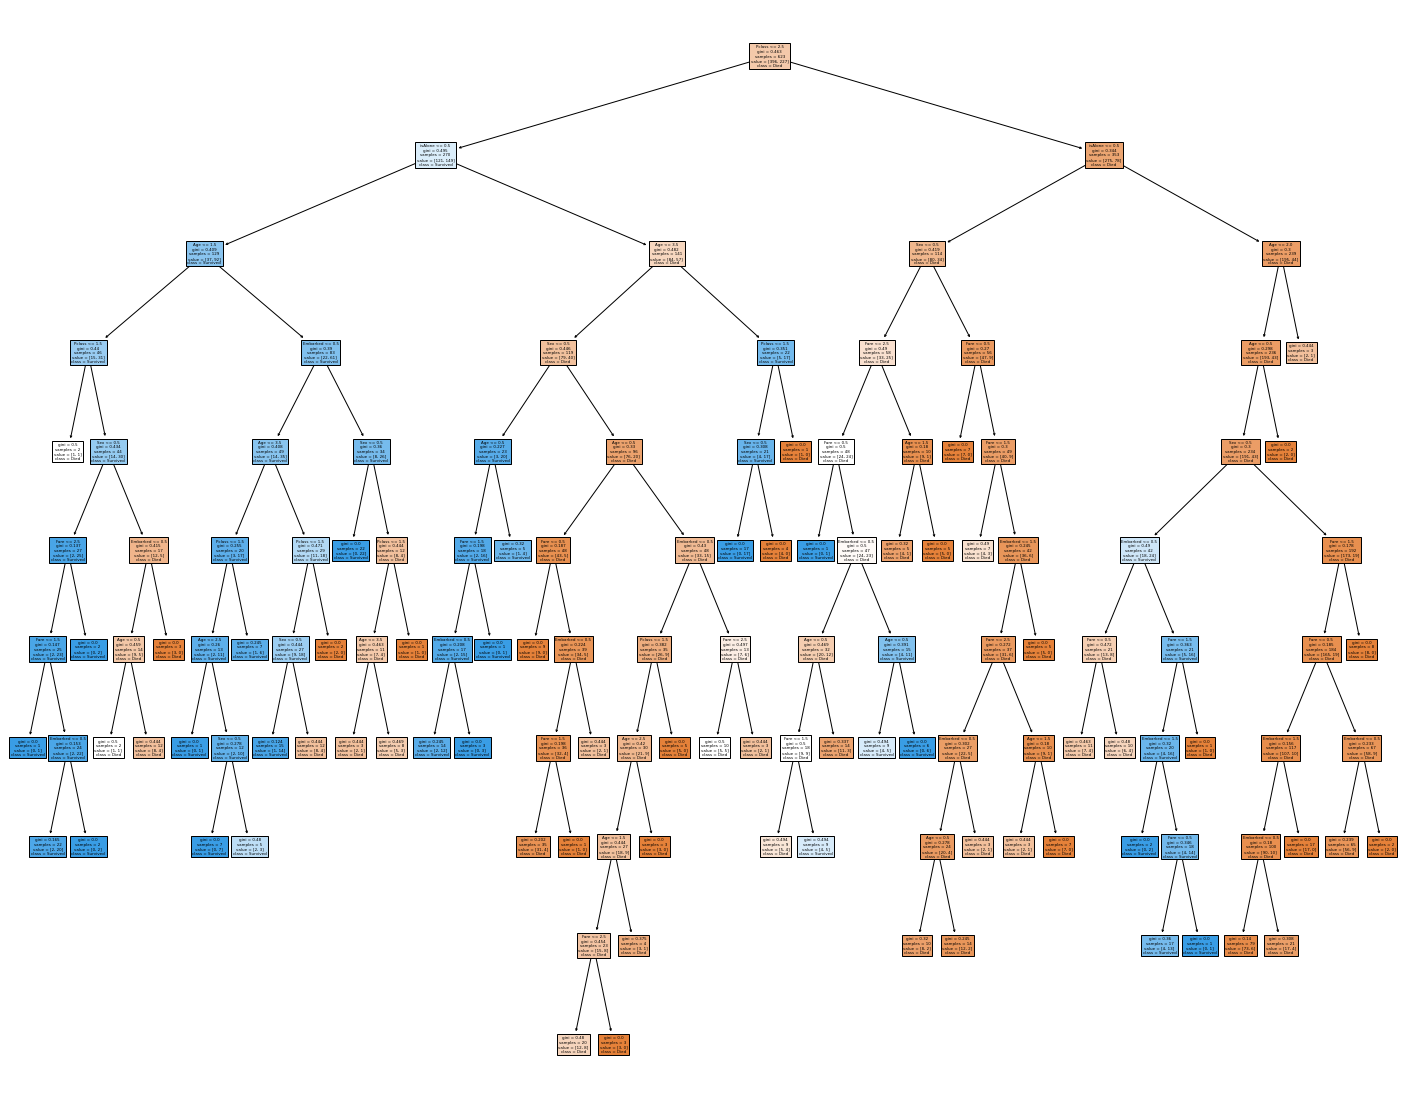

In [15]:

#we are using DecisionTreeClassifier to our modeland measuring its accuracy abd plotting the decision tree using matplotlib 

model = DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto')
t1 = model.fit(X_train,y_train)

prediction_tree = model.predict(X_test)
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))

#mentioning the number of folds for our classification
kfold = KFold(n_splits=5, random_state=1)
result_tree = cross_val_score(model,a,b,cv=5,scoring='accuracy')

print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    model, 
    feature_names = list(df_train.drop(['Survived'], axis=1)),
    class_names = ['Died', 'Survived'],
    filled=True)

In [13]:
#Training the dataset for RandomForest Clsassification 
a = df_train.drop("Survived",axis=1)
b = df_train["Survived"]
X_train,X_test,y_train,y_test = train_test_split(a,b,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 6), (268, 6), (623,), (268,))

In [16]:
#We are using RandomClassifier for our model and measuring its accuracy and fivefold validation 
model = RandomForestClassifier(
    criterion='gini',
    n_estimators=1000,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='auto',
    oob_score=True,
    n_jobs=-1)

model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=5)
result_rm=cross_val_score(model,a,b,cv=5,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,a,b,cv=5)

The accuracy of the Random Forest Classifier is 75.75
The cross validated score for Random Forest Classifier is: 79.13
